In [1]:
import sys; print(sys.executable)   # should be the env where you ran pip
import phoenix; print(phoenix.__file__)

/Users/annalena/miniconda3/envs/phoenix/bin/python
/Users/annalena/Documents/GitHub/phoenix/phoenix/__init__.py


In [2]:
from phoenix.potentials import miyamoto_nagai_potential as Phi
from phoenix.actionsampling import sample_actions_batch

/Users/annalena/Documents/GitHub/phoenix/phoenix/distributionfunctions.py:11: UserWarning: As of jaxtyping version 0.2.24, jaxtyping now prefers the syntax
```
from jaxtyping import jaxtyped
# Use your favourite typechecker: usually one of the two lines below.
from typeguard import typechecked as typechecker
from beartype import beartype as typechecker

@jaxtyped(typechecker=typechecker)
def foo(...):
```
and the old double-decorator syntax
```
@jaxtyped
@typechecker
def foo(...):
```
should no longer be used. (It will continue to work as it did before, but the new approach will produce more readable error messages.)
In particular note that `typechecker` must be passed via keyword argument; the following is not valid:
```
@jaxtyped(typechecker)
def foo(...):
```

  @jaxtyped
/Users/annalena/Documents/GitHub/phoenix/phoenix/distributionfunctions.py:39: UserWarning: As of jaxtyping version 0.2.24, jaxtyping now prefers the syntax
```
from jaxtyping import jaxtyped
# Use your favourite ty

In [3]:
# Miyamoto–Nagai params (example numbers)
M, a, b = 1.0, 6.0, 0.3

In [5]:
JR, Jz, Jphi, Rc, kap, nu = sample_actions_batch(
    Phi, M, a, b,
    N=20_000, seed=42,
    R0=8.0, Rd=2.6, Sigma0=1000.0,
    RsigR=7.0, RsigZ=7.0,
    sigmaR0_R0=35.0, sigmaz0_R0=20.0,
    Rmin=0.2, Rmax=30.0, Rinit_for_Rc=8.0
)

In [6]:
print("sampled actions (JR,Jz,Lz):")
print(JR)
print(Jz)
print(Jphi)

sampled actions (JR,Jz,Lz):
[ 48815.133 107099.01   74986.98  ... 455131.6    41307.137  85659.27 ]
[25554.275   1370.2556 14707.161  ...   366.862   7856.566   4238.516 ]
[0.33149448 0.31852254 0.4801972  ... 0.00352693 1.6661745  0.40082914]


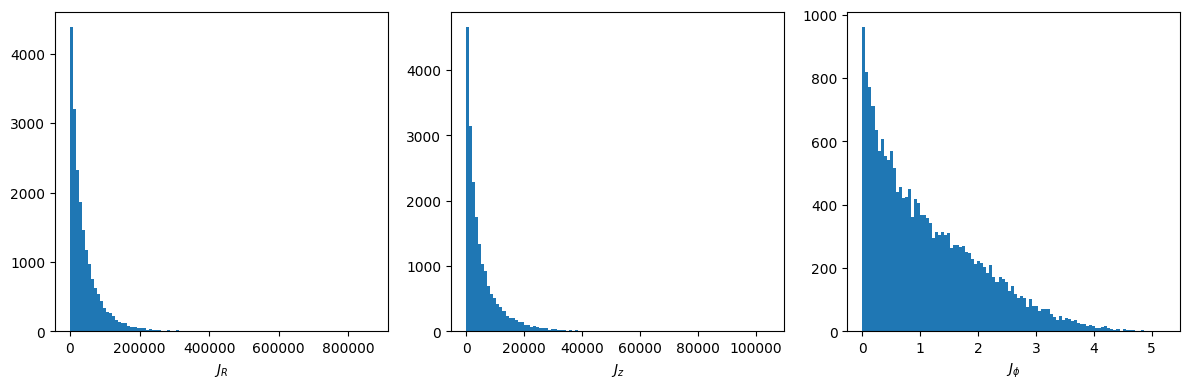

In [7]:
# Plot histograms of the actions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(JR, bins=100)#, density=True)
plt.xlabel(r"$J_R$")
plt.subplot(1, 3, 2)
plt.hist(Jz, bins=100)#, density=True)
plt.xlabel(r"$J_z$")
plt.subplot(1, 3, 3)
plt.hist(Jphi, bins=100)#, density=True)
plt.xlabel(r"$J_\phi$")
plt.tight_layout()
plt.show()

In [8]:
import jax
from phoenix.actiontophasespace import sample_phase_from_actions
from phoenix.potentials import miyamoto_nagai_potential as Phi

/Users/annalena/Documents/GitHub/phoenix/phoenix/actiontophasespace.py:15: UserWarning: As of jaxtyping version 0.2.24, jaxtyping now prefers the syntax
```
from jaxtyping import jaxtyped
# Use your favourite typechecker: usually one of the two lines below.
from typeguard import typechecked as typechecker
from beartype import beartype as typechecker

@jaxtyped(typechecker=typechecker)
def foo(...):
```
and the old double-decorator syntax
```
@jaxtyped
@typechecker
def foo(...):
```
should no longer be used. (It will continue to work as it did before, but the new approach will produce more readable error messages.)
In particular note that `typechecker` must be passed via keyword argument; the following is not valid:
```
@jaxtyped(typechecker)
def foo(...):
```

  @jaxtyped
/Users/annalena/Documents/GitHub/phoenix/phoenix/actiontophasespace.py:68: UserWarning: As of jaxtyping version 0.2.24, jaxtyping now prefers the syntax
```
from jaxtyping import jaxtyped
# Use your favourite typechec

In [9]:
# fresh RNG for angles
key = jax.random.PRNGKey(1)
x, y, z, vx, vy, vz = sample_phase_from_actions(
    key, Phi,
    JR, Jz, Jphi,
    M, a, b,              # potential params (*theta) for Phi
    Rinit_for_Rc=8.0,
)


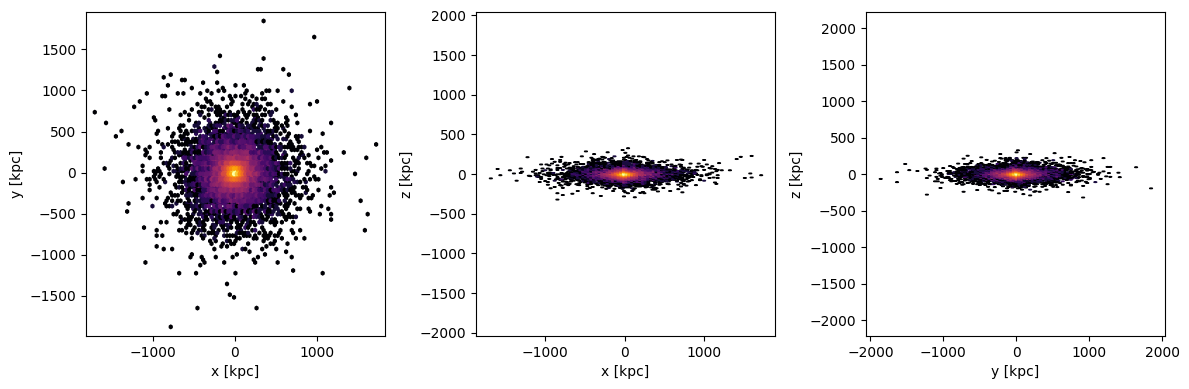

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.hexbin(x, y, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')
plt.axis('equal')
plt.subplot(132)
plt.hexbin(x, z, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('x [kpc]')
plt.ylabel('z [kpc]')
plt.axis('equal')
plt.subplot(133)
plt.hexbin(y, z, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('y [kpc]')
plt.ylabel('z [kpc]')
plt.axis('equal')
plt.tight_layout()
plt.show()

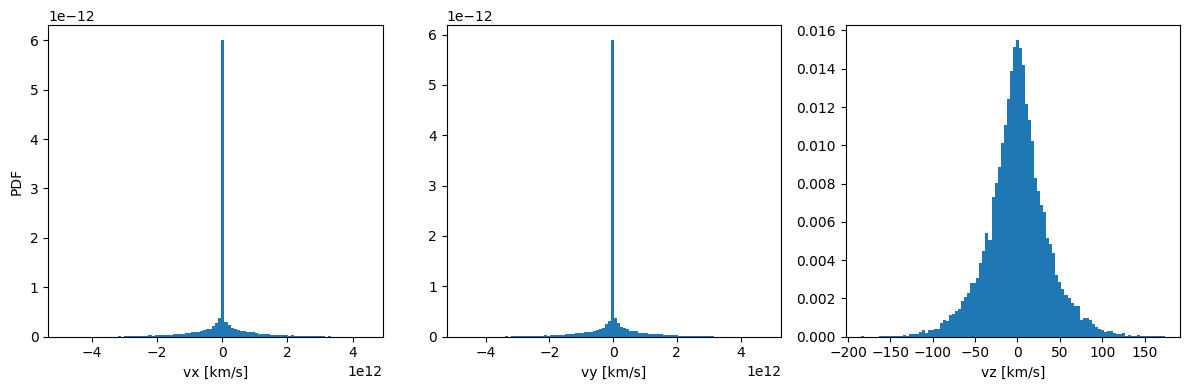

In [10]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.hist(vx, bins=100, density=True)
plt.xlabel('vx [km/s]')
plt.ylabel('PDF')
plt.subplot(132)
plt.hist(vy, bins=100, density=True)
plt.xlabel('vy [km/s]')
plt.subplot(133)
plt.hist(vz, bins=100, density=True)
plt.xlabel('vz [km/s]')
plt.tight_layout()
plt.show()

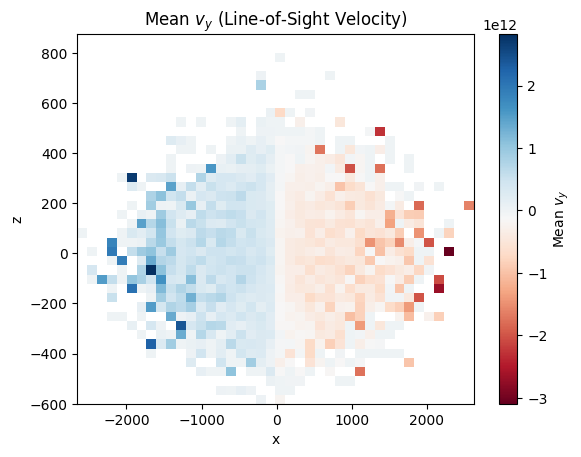

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

num_bins_x = 40
num_bins_z = 40 

# Example: x, z, v_y are 1D arrays of particle positions and velocities
# Define bin edges
x_bins = np.linspace(x.min(), x.max(), num_bins_x + 1)
z_bins = np.linspace(z.min(), z.max(), num_bins_z + 1)

# Digitize positions to bin indices
x_idx = np.digitize(x, x_bins) - 1
z_idx = np.digitize(z, z_bins) - 1

# Initialize array for mean v_y
mean_vy = np.full((num_bins_x, num_bins_z), np.nan)

# Calculate mean v_y for each bin
for i in range(num_bins_x):
    for j in range(num_bins_z):
        mask = (x_idx == i) & (z_idx == j)
        if np.any(mask):
            mean_vy[i, j] = np.mean(vy[mask])

# Plot with imshow
plt.imshow(mean_vy.T, origin='lower', aspect='auto',
           extent=[x_bins[0], x_bins[-1], z_bins[0], z_bins[-1]],
           cmap='RdBu')#, vmin = np.percentile(mean_vy, 0.001), vmax = np.percentile(mean_vy, 99.999))
plt.xlabel('x')
plt.ylabel('z')
plt.title('Mean $v_y$ (Line-of-Sight Velocity)')
plt.colorbar(label='Mean $v_y$')
plt.show()

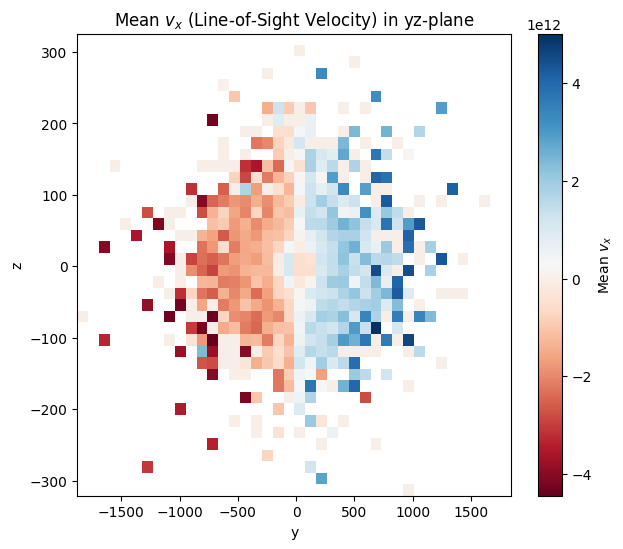

In [ ]:
# Plot mean line-of-sight velocity (mean vx) in the yz-plane
num_bins_y = 40
num_bins_z = 40

y_bins = np.linspace(y.min(), y.max(), num_bins_y + 1)
z_bins = np.linspace(z.min(), z.max(), num_bins_z + 1)

y_idx = np.digitize(y, y_bins) - 1
z_idx = np.digitize(z, z_bins) - 1

mean_vx = np.full((num_bins_y, num_bins_z), np.nan)

for i in range(num_bins_y):
    for j in range(num_bins_z):
        mask = (y_idx == i) & (z_idx == j)
        if np.any(mask):
            mean_vx[i, j] = np.mean(vx[mask])

plt.figure(figsize=(7, 6))
plt.imshow(mean_vx.T, origin='lower', aspect='auto',
           extent=[y_bins[0], y_bins[-1], z_bins[0], z_bins[-1]],
           cmap='RdBu')
plt.xlabel('y')
plt.ylabel('z')
plt.title('Mean $v_x$ (Line-of-Sight Velocity) in yz-plane')
plt.colorbar(label='Mean $v_x$')
plt.show()

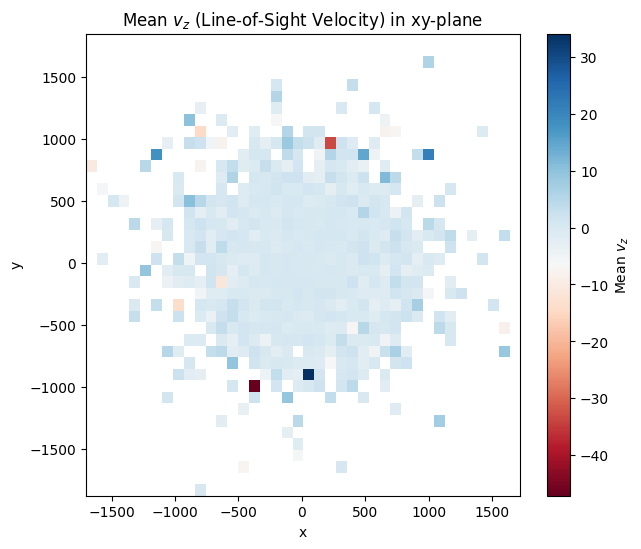

In [ ]:
# Plot mean line-of-sight velocity (mean vz) in the xy-plane
num_bins_x = 40
num_bins_y = 40

x_bins = np.linspace(x.min(), x.max(), num_bins_x + 1)
y_bins = np.linspace(y.min(), y.max(), num_bins_y + 1)

x_idx = np.digitize(x, x_bins) - 1
y_idx = np.digitize(y, y_bins) - 1

mean_vz = np.full((num_bins_x, num_bins_y), np.nan)

for i in range(num_bins_x):
    for j in range(num_bins_y):
        mask = (x_idx == i) & (y_idx == j)
        if np.any(mask):
            mean_vz[i, j] = np.mean(vz[mask])

plt.figure(figsize=(7, 6))
plt.imshow(mean_vz.T, origin='lower', aspect='auto',
           extent=[x_bins[0], x_bins[-1], y_bins[0], y_bins[-1]],
           cmap='RdBu')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Mean $v_z$ (Line-of-Sight Velocity) in xy-plane')
plt.colorbar(label='Mean $v_z$')
plt.show()